In [1]:
import nltk
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import re
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\mehdi\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\mehdi\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\mehdi\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [2]:
import pandas as pd
import numpy as np
import nltk
from nltk.corpus import stopwords
from sklearn import preprocessing
from nltk.stem import WordNetLemmatizer


In [3]:


nltk.download('omw-1.4')
lemmatizer = WordNetLemmatizer()

[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\mehdi\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
###reading excel file
df = pd.read_excel('IMDB Dataset.xlsx')

In [5]:
df.head(5)

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [ ]:
df.describe()

,review,sentiment
count,50000,50000
unique,49582,2
top,Loved today's show!!! It was a variety and not...,positive
freq,5,25000


In [ ]:
stop_words = set(stopwords.words('english'))

In [ ]:
df.head(5)

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [ ]:
##remove characters and punctuation from text
##[1]
def remove_special_chars(corpus):
  corpus = re.sub(r'[^\w\s]', '', corpus)
  corpus = re.sub('br br',' ', corpus)
  corpus = re.sub(' n ',' ', corpus)
  return corpus
df['review'] = df['review'].apply(remove_special_chars)

In [ ]:
df.head(5)

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production The filming te...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically theres a family where a little boy J...,negative
4,Petter Matteis Love in the Time of Money is a ...,positive


In [ ]:
###remove stopwords
##[2]
def remove_stopwords(corpus):
  text_tokens = word_tokenize(corpus)
  corpus = ' '.join(word for word in text_tokens if not word in stopwords.words('english'))
  return corpus
df['review'] = df['review'].apply(remove_stopwords)

In [ ]:
df.head(5)

,review,sentiment
0,One reviewers mentioned watching 1 Oz episode ...,positive
1,A wonderful little production The filming tech...,positive
2,I thought wonderful way spend time hot summer ...,positive
3,Basically theres family little boy Jake thinks...,negative
4,Petter Matteis Love Time Money visually stunni...,positive


In [ ]:
##tokenizer
def tokenize(corpus):
    return word_tokenize(corpus)

df['tokens'] = df['review'].apply(tokenize)

In [ ]:
##lemmatizer
##[3]
def lemmatize(corpus):
  return ' '.join([lemmatizer.lemmatize(word) for word in corpus])

df['lemma'] = df['tokens'].apply(lemmatize)


In [ ]:
df.head(5)

,review,sentiment,tokens,lemma
0,One reviewers mentioned watching 1 Oz episode ...,positive,"[One, reviewers, mentioned, watching, 1, Oz, e...",One reviewer mentioned watching 1 Oz episode y...
1,A wonderful little production The filming tech...,positive,"[A, wonderful, little, production, The, filmin...",A wonderful little production The filming tech...
2,I thought wonderful way spend time hot summer ...,positive,"[I, thought, wonderful, way, spend, time, hot,...",I thought wonderful way spend time hot summer ...
3,Basically theres family little boy Jake thinks...,negative,"[Basically, theres, family, little, boy, Jake,...",Basically there family little boy Jake think t...
4,Petter Matteis Love Time Money visually stunni...,positive,"[Petter, Matteis, Love, Time, Money, visually,...",Petter Matteis Love Time Money visually stunni...


In [ ]:
##replace lemmatize text with actual text and remove extra columns
df['review'] = df['lemma']
df=df.drop('tokens',axis=1)
df=df.drop('lemma',axis=1)

In [ ]:
df.head(5)

,review,sentiment
0,One reviewer mentioned watching 1 Oz episode y...,positive
1,A wonderful little production The filming tech...,positive
2,I thought wonderful way spend time hot summer ...,positive
3,Basically there family little boy Jake think t...,negative
4,Petter Matteis Love Time Money visually stunni...,positive


In [ ]:
training_data = df[:40000]
test_data = df[40000:]

In [ ]:
##[4]
training_data.drop_duplicates(subset='review', inplace=True)
test_data.drop_duplicates(subset='review', inplace=True)

/usr/local/lib/python3.8/dist-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


In [ ]:
training_data

,Unnamed: 0,review,sentiment
0,0,One reviewer mentioned watching 1 Oz episode y...,positive
1,1,A wonderful little production The filming tech...,positive
2,2,I thought wonderful way spend time hot summer ...,positive
3,3,Basically there family little boy Jake think t...,negative
4,4,Petter Matteis Love Time Money visually stunni...,positive
...,...,...,...
39995,39995,This marvelously funny comedy great cast John ...,positive
39996,39996,There plot There central character There movin...,positive
39997,39997,This show awesome I love actor It great story ...,positive
39998,39998,The fact movie entitled successful movie Switz...,negative


In [ ]:
test_data

,Unnamed: 0,review,sentiment
40000,40000,First I want say I lean liberal political scal...,negative
40001,40001,I excited see sitcom would hopefully represent...,negative
40002,40002,When look cover read stuff entirely different ...,negative
40003,40003,Like many others I counted appearance Dennis H...,negative
40004,40004,This movie tv day I didnt enjoy The first Geor...,negative
...,...,...,...
49995,49995,I thought movie right good job It wasnt creati...,positive
49996,49996,Bad plot bad dialogue bad acting idiotic direc...,negative
49997,49997,I Catholic taught parochial elementary school ...,negative
49998,49998,Im going disagree previous comment side Maltin...,negative


In [ ]:
X_train , y_train = training_data['review'],training_data['sentiment']
X_test , y_test = test_data['review'],test_data['sentiment']

In [ ]:
##[5]
from sklearn.feature_extraction.text import TfidfVectorizer
tfidfvectorizer = TfidfVectorizer(lowercase = True)
tfidf = tfidfvectorizer.fit(X_train)
X_train_tfidf = tfidf.transform(X_train)
X_test_tfidf = tfidf.transform(X_test)

In [ ]:
readable_train = pd.DataFrame(X_train_tfidf[0].toarray(),columns=tfidf.get_feature_names())

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
##[6]
readable_train

,00,000,0000000000001,00000001,000001,00000110,0001,001,0010,002,...,ããnekoski,ãœber,ãœberbabe,ãœnel,ãœnfaithful,ãœvegtigris,ãœzã¼mcã¼,ãšxtase,ãžorleifsson,ãžã³r
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
readable_train['one']

0    0.01824
Name: one, dtype: float64

In [ ]:
tfidf.vocabulary_

{'one': 90737,
 'reviewer': 105985,
 'mentioned': 80236,
 'watching': 137368,
 'oz': 92964,
 'episode': 41891,
 'youll': 142210,
 'hooked': 60389,
 'they': 126792,
 'right': 106475,
 'exactly': 43067,
 'happened': 56759,
 'the': 126355,
 'first': 47162,
 'thing': 126885,
 'struck': 121653,
 'brutality': 19158,
 'unflinching': 132901,
 'scene': 110185,
 'violence': 135907,
 'set': 112937,
 'word': 140504,
 'go': 52950,
 'trust': 130713,
 'show': 114556,
 'faint': 44513,
 'hearted': 57788,
 'timid': 128126,
 'this': 127083,
 'pull': 101140,
 'punch': 101214,
 'regard': 104328,
 'drug': 38273,
 'sex': 113108,
 'its': 65942,
 'hardcore': 56880,
 'classic': 25292,
 'use': 134243,
 'it': 65735,
 'called': 20672,
 'nickname': 87221,
 'given': 52604,
 'oswald': 91832,
 'maximum': 78906,
 'security': 111603,
 'state': 120137,
 'penitentary': 94923,
 'focus': 48087,
 'mainly': 76841,
 'emerald': 40733,
 'city': 25090,
 'experimental': 43678,
 'section': 111586,
 'prison': 99802,
 'cell': 22615,


In [ ]:
##[7]
X_train_tfidf.shape

(39729, 143478)

In [ ]:
##[8]
from sklearn.decomposition import TruncatedSVD
svd = TruncatedSVD(n_components=1200,random_state=42)
idfsvd = svd.fit(X_train_tfidf)
X_train_SVD = idfsvd.transform(X_train_tfidf)
X_test_SVD = idfsvd.transform(X_test_tfidf)

In [ ]:
##[9]
RF = RandomForestClassifier(random_state=1,criterion='entropy')
params_grid=[{'min_samples_leaf':[1,100,150,200,300],
              'max_depth':[None,5,10,15,20,30,40],
              'bootstrap':[True,False]}]

In [ ]:
RF_GS =GridSearchCV (RF,params_grid,cv = 5,scoring ='accuracy',return_train_score = True)

In [ ]:
RF_GS.fit(X_train_SVD,y_train)

In [ ]:
RF_GS.best_params_

In [ ]:
from sklearn.metrics import classification_report, ConfusionMatrixDisplay


In [ ]:
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn import utils
from sklearn.model_selection import KFold

In [ ]:
###[10]
def krepeatedkfold(n_iter,n_splits,X_,y_):
  precision = {}
  recall = {}
  f1 = {}
  acc = []
  recall['positive'] = []
  recall['negative'] = []
  precision['positive'] = []
  precision['negative'] = []
  f1['positive'] = []
  f1['negative'] = []
  for i in range(n_iter):
        X,y=utils.shuffle(np.array(X_), np.array(y_))
        kf = KFold(n_splits=n_splits , random_state=42,shuffle=True)
        for train_index, val_index in kf.split(X):
          X_train_folds = X[train_index]
          y_train_folds = y[train_index]
          X_val_fold = X[val_index]
          y_val_fold = y[val_index]

          RF = RandomForestClassifier(random_state=1,criterion='entropy',bootstrap = False,
                                max_depth = 15 , min_samples_leaf = 100,n_estimators = 100 , n_jobs=-1)
          RF.fit(X_train_folds,y_train_folds)
          y_predictions = RF.predict(X_val_fold)
          acc.append(accuracy_score(y_val_fold,y_predictions))
          recall['positive'].append(recall_score(y_val_fold,y_predictions,pos_label = 'positive'))
          recall['negative'].append(recall_score(y_val_fold,y_predictions,pos_label = 'negative'))
          precision['positive'].append(precision_score(y_val_fold,y_predictions,pos_label = 'positive'))
          precision['negative'].append(precision_score(y_val_fold,y_predictions,pos_label = 'negative'))
          f1['positive'].append(f1_score(y_val_fold,y_predictions,pos_label = 'positive'))
          f1['negative'].append(f1_score(y_val_fold,y_predictions,pos_label = 'negative'))
  return RF,precision,recall,f1,acc          

In [ ]:
RF_OPT , precision_ , recall_ , f1_, acc_ =  krepeatedkfold(3,5,X_train_SVD,y_train)

In [ ]:
np.mean(acc_)

0.8029063717327117

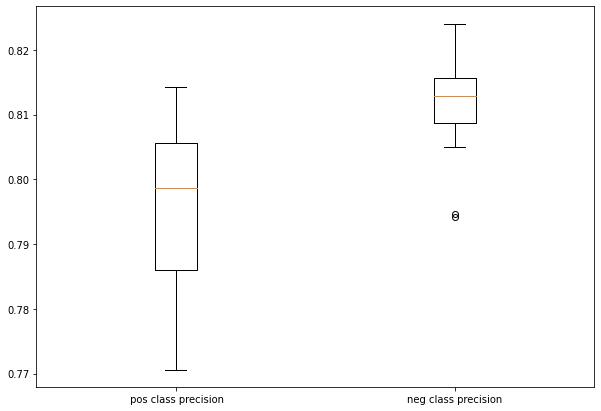

In [ ]:
##[11]
import matplotlib.pyplot as plt
fig = plt.figure(figsize =(10, 7))
plt.boxplot(x=[precision_['positive'],precision_['negative']],labels=(" pos class precision","neg class precision"))
plt.show()

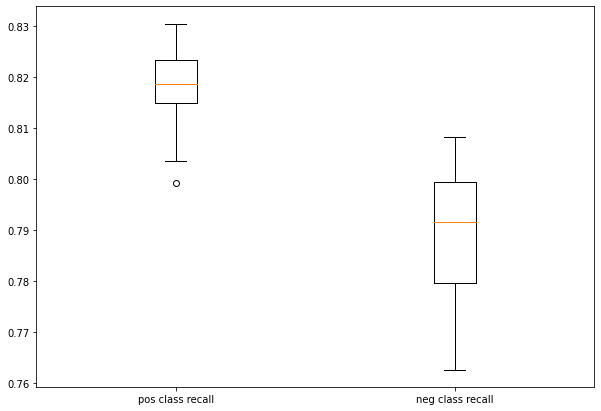

In [ ]:
fig = plt.figure(figsize =(10, 7))
plt.boxplot(x=[recall_['positive'],recall_['negative']],labels=("pos class recall","neg class recall"))
plt.show()

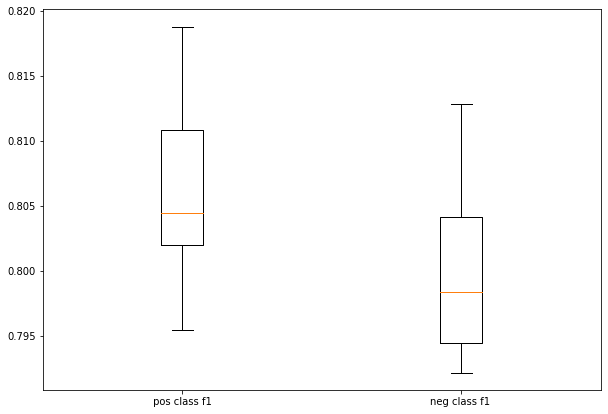

In [ ]:
fig = plt.figure(figsize =(10, 7))
plt.boxplot(x=[f1_['positive'],f1_['negative']],labels=(" pos class f1 ","neg class f1 "))
plt.show()

In [ ]:
##[12]
print(np.std(precision_['positive']),np.std(precision_['negative']))
print(np.std(recall_['positive']),np.std(recall_['negative']))
print(np.std(f1_['positive']),np.std(f1_['negative']))

0.012174806840996536 0.007919697832006575
0.00840571196412759 0.012611045821441628
0.006111215385912202 0.005901011110473001


In [ ]:
print(np.mean(precision_['positive']),np.mean(precision_['negative']))
print(np.mean(recall_['positive']),np.mean(recall_['negative']))
print(np.mean(f1_['positive']),np.mean(f1_['negative']))

0.7952795214296435 0.8112066871952383
0.8174292032592677 0.7884701037688396
0.8061099915271347 0.7995778948510252


In [ ]:
y_RF = RF_OPT.predict(X_test_SVD)

In [ ]:
print(classification_report(y_test,y_RF))

              precision    recall  f1-score   support

    negative       0.82      0.78      0.80      4978
    positive       0.79      0.83      0.81      5003

    accuracy                           0.81      9981
   macro avg       0.81      0.81      0.81      9981
weighted avg       0.81      0.81      0.81      9981



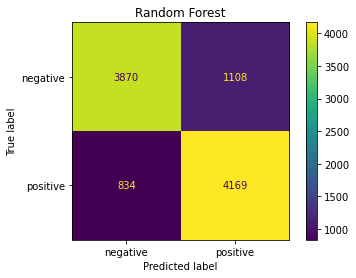

In [ ]:
##[13]
ConfusionMatrixDisplay.from_predictions(y_test,y_RF)
plt.title("Random Forest")
plt.show()